# Dataset para a PI

## Imports necessários

In [2]:
import requests # Fazer uma solicitação HTTP
from bs4 import BeautifulSoup # Para a manipulação de HTML
import pandas as pd # Criação de dataframes
from io import StringIO # manipulaimport requests # Fazer uma solicitação HTTP
import matplotlib.pyplot as plt
import re
import seaborn as sns


## Funções usadas para tratamento da base


In [3]:
def categorize_incident(incident):
    if isinstance(incident, str):  # Verifica se é uma string antes de usar .lower()
        for category, keywords in categorias.items():
            for keyword in keywords:
                if keyword in incident.lower():
                    return category
    return 'Other'

def categorize_threat_level(category):
    for threat_level, categories in threat_levels.items():
        if category in categories:
            return threat_level
    return 'baixo'

def remove_text_and_commas(cell):
    if isinstance(cell, str):  # Certifica-se de que a célula é uma string
        # Remove tudo que não seja número
        clean_cell = re.sub(r'[^\d]', '', cell)
        return clean_cell if clean_cell else None  # Se a célula estiver vazia, retorna None
    return cell

## Webscraping da tabela da base do Wikipedia


In [9]:
# Configurações do Pandas para exibir todas as linhas e colunas sem truncamento
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# URL da página da Wikipedia que contém a lista de violação de dados
url = "https://en.wikipedia.org/wiki/List_of_data_breaches"
# Faz uma requisição GET para obter o conteúdo da página
resposta = requests.get(url)

# Verifica se a requisição foi bem-sucedida (código 200)
if resposta.status_code == 200:
    # Cria um objeto BeautifulSoup para analisar o HTML da página
    soup = BeautifulSoup(resposta.content, 'html.parser')
    # Encontra todas as tabelas com a classe 'wikitable sortable'
    tables = soup.find_all('table', {'class': 'wikitable sortable'})

    # Verifica se há pelo menos duas tabelas na página
    if len(tables) >= 2:
        # Lê a segunda tabela e a armazena em um DataFrame
        df = pd.read_html(StringIO(str(tables[1])))[0]

        # Dicionário para categorizar os incidentes de acordo com palavras-chave
        categorias = {
            'Incidentes relacionados a hacking': ['hacked', 'credential', 'trojan', 'ransomware'],
            'Exposição de dados/Má configuração': ['published', 'exposed', 'misconfigured', 'unsecured'],
            'Ameaças internas': ['inside job', 'insider', 'rogue', 'employee'],
            'Furto físico/Perda': ['lost', 'stolen', 'magnetic tape'],
            'Engenharia social': ['phishing', 'social engineering'],
            'Outro': []
        }

        # Dicionário para definir os níveis de ameaça baseados nas categorias
        threat_levels = {
            'alto': ['Incidentes relacionados a hacking', 'Engenharia social'],
            'medio': ['Exposição de dados/Má configuração', 'Furto físico/Perda'],
            'baixo': ['Ameaças internas'],
            'desconhecido': ['Outro']
        }

        # Aplica a função remove_text_and_commas à coluna 'Records' para limpar os dados
        df['Records'] = df['Records'].apply(remove_text_and_commas)

        # Substitui valores NaN por 'null' nas colunas específicas do DataFrame
        df['Entity'] = df['Entity'].fillna('null')
        df['Year'] = df['Year'].fillna('null')
        df['Records'] = df['Records'].fillna('null')
        df['Organization type'] = df['Organization type'].fillna('null')
        df['Method'] = df['Method'].fillna('null')

        # Aplica a categorização dos incidentes e determina o nível de ameaça
        df['categoria'] = df['Method'].apply(categorize_incident)
        df['nivel_ameaca'] = df['categoria'].apply(categorize_threat_level)

        # Remove a coluna 'Sources' do DataFrame
        df = df.drop('Sources', axis=1)

        # Renomeia colunas para tornar os nomes mais amigáveis
        df = df.rename(columns={'Entity': 'empresa',
                                 'Year': 'ano',
                                 'Records': 'numero_incidentes',
                                 'Organization type': 'ramo_empresa',
                                 'Method': 'tipo_incidente'})

        # Exibe o DataFrame final com os dados processados
        display(df.sort_values(by=["empresa", "ano"]))
    else:
        print("Não há tabelas suficientes.")
else:
    print("Erro ao acessar a página.")


,empresa,ano,numero_incidentes,ramo_empresa,tipo_incidente,categoria,nivel_ameaca
1,21st Century Oncology,2015,2200000,healthcare,hacked,Incidentes relacionados a hacking,alto
2,23andMe,2023,6900000,consumer genetics,credential stuffing,Incidentes relacionados a hacking,alto
0,50 companies and government institutions,2022,6400000,various,poor security,Other,baixo
3,500px,2020,14870304,social network,hacked,Incidentes relacionados a hacking,alto
8,ADT Inc.,2024,30800,security,"""accessing certain databases containing custom...",Other,baixo
22,AOL,2004,92000000,web,inside job,Ameaças internas,baixo
23,AOL,2006,20000000,web,"accidentally published, (sometimes referred to...",Exposição de dados/Má configuração,medio
24,AOL,2014,2400000,web,hacked,Incidentes relacionados a hacking,alto
30,AT&T,2008,113000,telecoms,lost / stolen computer,Furto físico/Perda,medio
31,AT&T,2010,114000,telecoms,hacked,Incidentes relacionados a hacking,alto


## Criação dos gráficos (nome do dataframe: df)
exemplo: display(df)

In [62]:
#print(df.dtypes)
print(len(df[df["numero_incidentes"]=="null"]))
print(len(newdf))
ni=[]
for i in range(len(df)):
  if df.iloc[i]["numero_incidentes"]!="null":
    x=float(df.iloc[i]["numero_incidentes"])
    if x<=100000000:
      ni.append(x)
    else:
      ni.append(0)
  else:
    ni.append(0)

print(ni)
df["NI"]=ni

42
362
[6400000.0, 2200000.0, 6900000.0, 14870304.0, 175350.0, 0, 0, 7500000.0, 30800.0, 4000000.0, 75000.0, 344579.0, 0, 20000.0, 4500000.0, 0, 200000.0, 260000.0, 300000.0, 46000000.0, 156000.0, 80000000.0, 92000000.0, 20000000.0, 2400000.0, 0, 12367232.0, 275000.0, 91000.0, 32000000.0, 113000.0, 114000.0, 72000000.0, 0, 18000000.0, 550000.0, 125000.0, 1220000.0, 250000.0, 12500000.0, 1200000.0, 63.0, 1900000.0, 100000.0, 35040000.0, 2300000.0, 200000.0, 0, 0, 7633234.0, 14000000.0, 1023039.0, 90000.0, 0, 500000.0, 0, 1114954.0, 0, 350000.0, 0, 40000000.0, 9400000.0, 1100000.0, 60000.0, 110000.0, 5000000.0, 283000.0, 56000000.0, 800000.0, 6000000.0, 10000000.0, 163000.0, 3900000.0, 360083.0, 150000.0, 0, 0, 4500000.0, 1000000.0, 2500000.0, 40000.0, 100000.0, 19972829.0, 0, 1107034.0, 192000.0, 8637405.0, 8000000.0, 56000.0, 500000.0, 49000000.0, 350.0, 9700000.0, 12.0, 600000.0, 948029.0, 4900000.0, 68648009.0, 1000000.0, 1400000.0, 0, 1000000.0, 2676696.0, 2000000.0, 0, 0, 3300000.0

In [63]:
#OBS: Coloquei apenas os 10 setores, pois visualmente ficou bagunçado e dificil de entender com todos os setores.
# Impacto Social - Empresas Atacadas - 10 setores mais afetados
df10=df[["ramo_empresa","NI"]].groupby(by="ramo_empresa").sum().reset_index()
df10=df10.sort_values(by="NI", ascending=False).head(10)

print(df10)
# setor_counts = df10['ramo_empresa'].value_counts().head(10)

# Gráfico de barras verticais
# sns.barplot(x=setor_counts.values, y=setor_counts.index, hue=setor_counts.index, dodge=False, legend=False)
sns.barplot(x=df10.values, y=df10.index, hue=df10.index, dodge=False, legend=False)

# Títulos e rótulos
plt.title('Os 10 Setores mais afetados por Ataques Cibernéticos', fontsize=16)
plt.xlabel('Número de Incidentes', fontsize=12)
plt.ylabel('Setor da Empresa', fontsize=12)

plt.show()

          ramo_empresa           NI
72                 web  653351538.0
21           financial  237227083.0
26              gaming  232197529.0
57      social network  211229425.0
54              retail  197806447.0
28          healthcare  186398080.0
15          e-commerce  171698979.0
67            telecoms  138497000.0
66  telecommunications  125800000.0
36        local search  100000000.0


ValueError: Per-column arrays must each be 1-dimensional

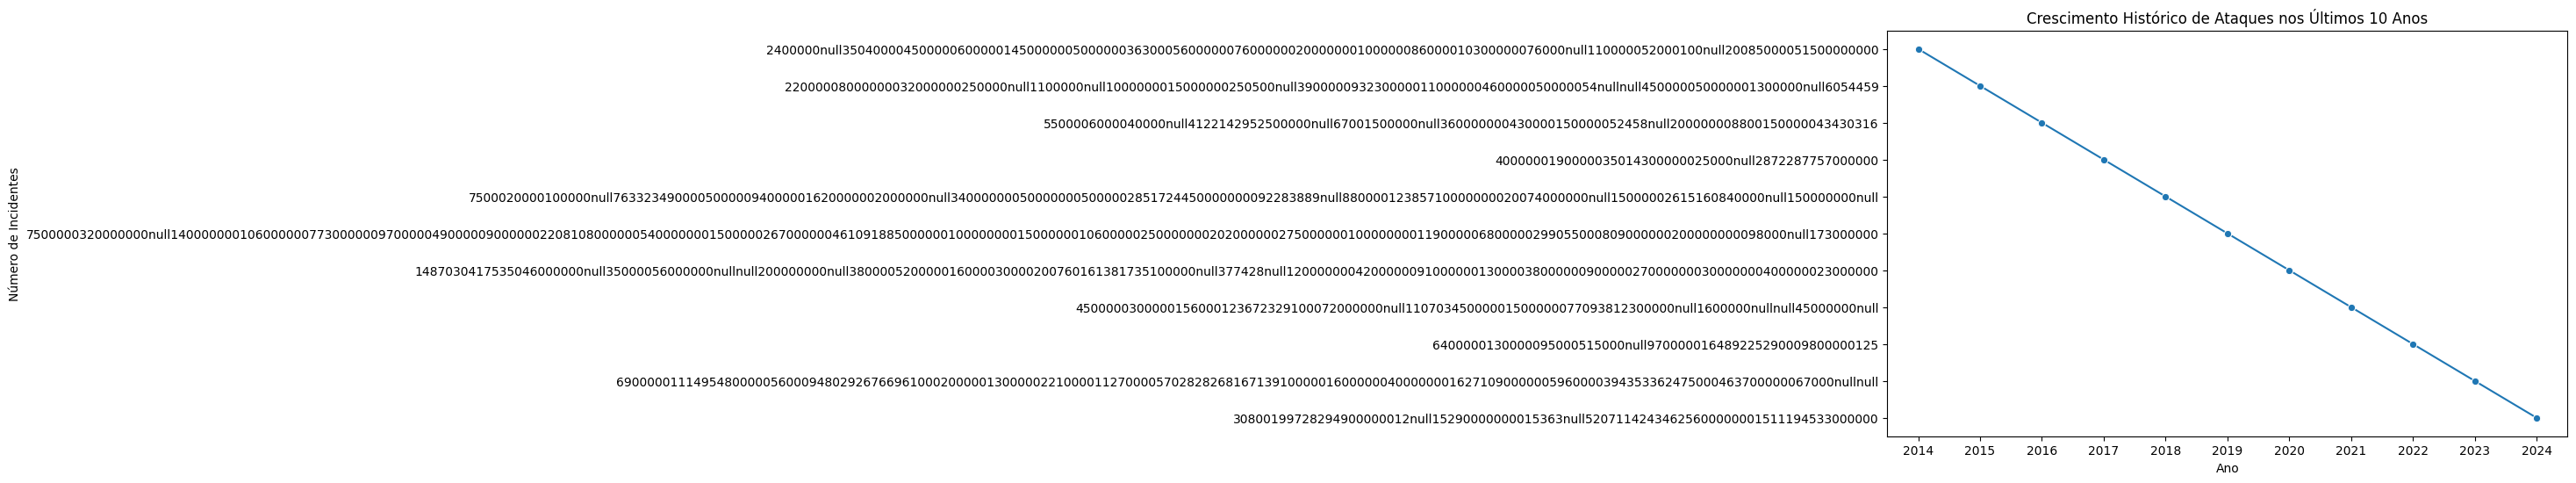

In [6]:
#OBS: Analisar melhor esse gráfico, pois não sei se esta de acordo com o que queremos. O ataque está muito elevado apenas em 2019.
# Projeção de Crescimento de Ataques nos últimos 10 anos
ano_atual = df['ano'].max()
df_ultimos_10_anos = df[df['ano'] >= (ano_atual - 10)]

# Agrupar os dados por ano e soma o número de incidentes
df_agrupado = df_ultimos_10_anos.groupby('ano')['numero_incidentes'].sum().reset_index()

# Gráfico de linha que mostrar o crescimento histórico
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_agrupado, x='ano', y='numero_incidentes', marker='o')

# Títulos
plt.title('Crescimento Histórico de Ataques nos Últimos 10 Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Incidentes')

# Mostra no eixo x todos os anos (últimos 10 anos)
plt.xticks(df_agrupado['ano'])

plt.show()